# **Spotify EDA**
This colab notebook explores the [Kaggle Spotify Dataset](https://www.kaggle.com/andiqayyum/spotify-songs-analysis-from-1920-to-2020/data?select=data.csv) with songs from 1922 to 2020. 

# Imports and Co-Lab Set Up

In [1]:
import pandas as pd
from google.colab import drive

import seaborn as sns
import matplotlib.pyplot as plt

from collections import defaultdict

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


# Part 1: Exploring the Original Spotify Data

## 1.1: Features

In [3]:
# Get spotify data
path_to_spotify_data = '/content/drive/Shared drives/CIS545 Final Project/spotify_data.csv'

# Create dataframe -- drop duplicates and nulls
spotify_df = pd.read_csv(path_to_spotify_data, error_bad_lines=False).dropna().drop_duplicates()

In [4]:
# Convert column values from Strings to nums 
cols_to_numeric = ['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity', 'valence']
spotify_df[cols_to_numeric] = spotify_df[cols_to_numeric].apply(pd.to_numeric)

In [5]:
# Display dataframe 
spotify_df

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174379,0.795000,['Alessia Cara'],0.429,144720,0.211,0,45XnLMuqf3vRfskEAMUeCH,0.000000,4,0.1960,-11.665,1,A Little More,0,2021-01-22,0.0360,94.710,0.2280,2021
174381,0.795000,['Alessia Cara'],0.429,144720,0.211,0,4pPFI9jsguIh3wC7Otoyy8,0.000000,4,0.1960,-11.665,1,A Little More,0,2021-01-22,0.0360,94.710,0.2280,2021
174383,0.795000,['Alessia Cara'],0.429,144720,0.211,0,52YtxLVUyvtiGPxwwxayHZ,0.000000,4,0.1960,-11.665,1,A Little More,0,2021-01-22,0.0360,94.710,0.2280,2021
174385,0.795000,['Alessia Cara'],0.429,144720,0.211,0,7tue2Wemjd0FZzRtDrQFZd,0.000000,4,0.1960,-11.665,1,A Little More,0,2021-01-22,0.0360,94.710,0.2280,2021


In [6]:
# Columns in the dataframe
spotify_df.columns.values

array(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'name', 'popularity', 'release_date',
       'speechiness', 'tempo', 'valence', 'year'], dtype=object)

## 1.2: Visualizations

Here, we created a heatmap to visualize the correlation of different columns with each other. 

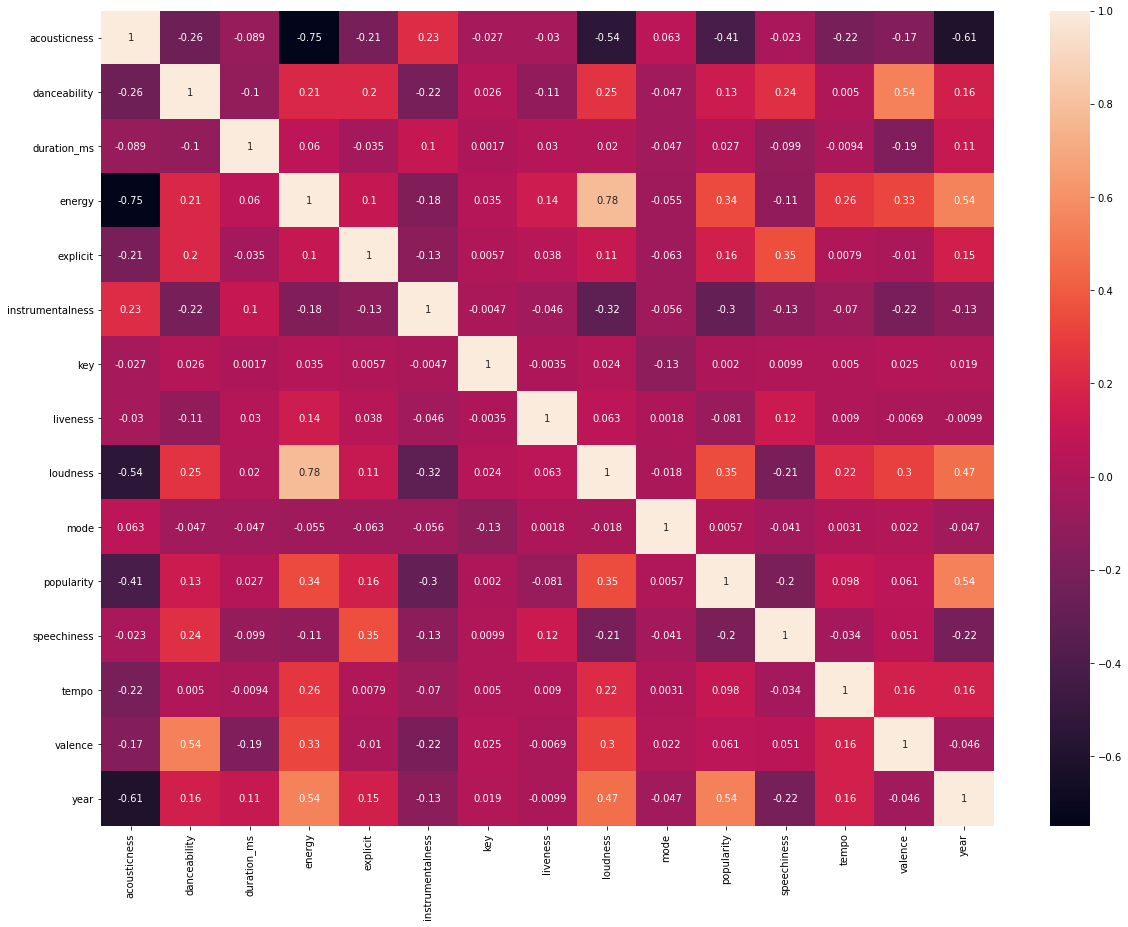

In [7]:
plt.subplots(figsize=(20,15))
sns.heatmap(spotify_df.corr(), annot=True)

We also wanted to see the distribution of songs over the years in the dataset to make sure it wasn't overly uneven. 

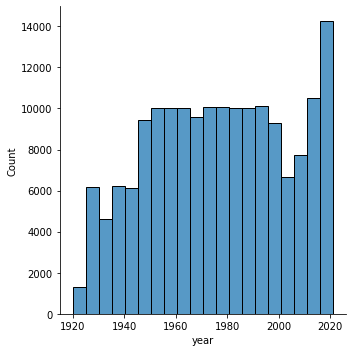

In [8]:
sns.displot(spotify_df['year'], bins =20)

# Part 2: Merging and Exploring Genre 

We also wanted to figure out the genre of each song. We did this by merging our Spotify dataset with a [Kaggle Spotify genre classification](https://www.kaggle.com/danielsheen/spotify-song-genre-classification
) dataset. 

## Part 2.1: Original Spotify Kaggle Dataset

In [9]:
# Load in genre classification dataset
path_to_top_two_thousand = '/content/drive/Shared drives/CIS545 Final Project/Spotify-2000.csv'

# Create dataframe -- Drop nulls and duplicates, only get Song Title, Genre, and Artist columns
df_top_two_thousand = pd.read_csv(path_to_top_two_thousand).dropna().drop_duplicates()[['Title', 'Artist', 'Top Genre']]

In [10]:
# Display dataframe
df_top_two_thousand

,Title,Artist,Top Genre
0,Sunrise,Norah Jones,adult standards
1,Black Night,Deep Purple,album rock
2,Clint Eastwood,Gorillaz,alternative hip hop
3,The Pretender,Foo Fighters,alternative metal
4,Waitin' On A Sunny Day,Bruce Springsteen,classic rock
...,...,...,...
1989,Heartbreak Hotel,Elvis Presley,adult standards
1990,Hound Dog,Elvis Presley,adult standards
1991,Johnny B. Goode,Chuck Berry,blues rock
1992,Take Five,The Dave Brubeck Quartet,bebop


In [11]:
# List of genres included 
df_top_two_thousand["Top Genre"].unique()

array(['adult standards', 'album rock', 'alternative hip hop',
       'alternative metal', 'classic rock', 'alternative pop rock', 'pop',
       'modern rock', 'detroit hip hop', 'alternative rock',
       'dutch indie', 'garage rock', 'dutch cabaret', 'permanent wave',
       'classic uk pop', 'dance pop', 'modern folk rock', 'dutch pop',
       'dutch americana', 'alternative dance', 'german pop', 'afropop',
       'british soul', 'irish rock', 'disco', 'big room', 'art rock',
       'danish pop rock', 'neo mellow', 'britpop', 'boy band',
       'carnaval limburg', 'arkansas country', 'latin alternative',
       'british folk', 'celtic', 'chanson', 'celtic rock', 'hip pop',
       'east coast hip hop', 'dutch rock', 'blues rock', 'electro',
       'australian pop', 'belgian rock', 'downtempo', 'reggae fusion',
       'british invasion', 'finnish metal', 'canadian pop', 'bow pop',
       'dutch hip hop', 'dutch metal', 'soft rock', 'acoustic pop',
       'acid jazz', 'dutch prog', 'ca

## Part 2.2: Simplifying Genres
Given the large number of genres present, we decided to simplify classifications by choosing a few representative genres:

*   Rock
*   Jazz
* Hip Hop
* Pop
* Alternative 
* Adult Standards
* Folk
* Indie
* Metal



In [12]:
general_genres = ['rock', 'jazz', 'hip hop', 'pop', 'alternative', 'adult standards', 'folk', 'indie', 'metal']

# Encodes each genre as an integer
encoding = {}

for i in range(len(general_genres)):
  encoding.update({general_genres[i]: i})
encoding.update({'other': 9})

print(encoding)

{'rock': 0, 'jazz': 1, 'hip hop': 2, 'pop': 3, 'alternative': 4, 'adult standards': 5, 'folk': 6, 'indie': 7, 'metal': 8, 'other': 9}


**Converting original genre to general genre** 

If a general genre was in the name of the original genre, it was counted to be a song of the first general genre it comes across. 


*For example,*    
*album rock -> rock*     
*british alternative rock -> alternative*

In [13]:
def convert_to_generic_genre(genre):
  for g in general_genres:
    if g in genre:
      return g
  return 'other'

df_top_two_thousand['Top Genre'] = df_top_two_thousand['Top Genre'].apply(lambda g: convert_to_generic_genre(g))
df_top_two_thousand['Artist'] = df_top_two_thousand['Artist'].apply(lambda a: [a])

In [14]:
# Display dataframe with genres
df_top_two_thousand

,Title,Artist,Top Genre
0,Sunrise,[Norah Jones],adult standards
1,Black Night,[Deep Purple],rock
2,Clint Eastwood,[Gorillaz],hip hop
3,The Pretender,[Foo Fighters],alternative
4,Waitin' On A Sunny Day,[Bruce Springsteen],rock
...,...,...,...
1989,Heartbreak Hotel,[Elvis Presley],adult standards
1990,Hound Dog,[Elvis Presley],adult standards
1991,Johnny B. Goode,[Chuck Berry],rock
1992,Take Five,[The Dave Brubeck Quartet],other


In [15]:
# Distrubtion of general genres
genre_barcounts = df_top_two_thousand.groupby('Top Genre').count().reset_index()
genre_barcounts = genre_barcounts.rename(columns={"Title": "Count"}).drop(columns=['Artist'])
genre_barcounts

,Top Genre,Count
0,adult standards,123
1,alternative,87
2,folk,21
3,hip hop,29
4,indie,77
5,jazz,3
6,metal,23
7,other,386
8,pop,388
9,rock,857


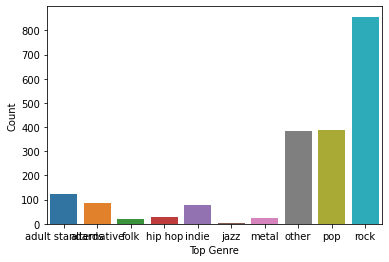

In [16]:
sns.barplot(x=genre_barcounts['Top Genre'], y = genre_barcounts['Count'])

## Part 2.3: Merge Genre with Spotify Songs

In [22]:
merged_df = df_top_two_thousand.merge(spotify_df, left_on='Title', right_on='name').drop_duplicates(subset=['Title'])
merged_df = merged_df.drop(['name'], axis=1)
merged_df['genre encoding'] = merged_df['Top Genre'].apply(lambda g: encoding.get(g))
merged_df

,Title,Artist,Top Genre,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,popularity,release_date,speechiness,tempo,valence,year,genre encoding
0,Sunrise,[Norah Jones],adult standards,0.2440,['Ryan Bingham'],0.391,285827,0.681,0,0KefTgKt7yjGkKPyO7yryV,0.000108,4,0.5860,-7.231,1,61,2007-01-01,0.0328,137.567,0.255,2007,5
14,Black Night,[Deep Purple],rock,0.1430,['Bob Seger'],0.675,202227,0.886,0,0AgjxRK2lMzGnLJX9J5TBn,0.001300,9,0.2270,-4.312,1,23,1975-04-05,0.0295,118.747,0.954,1975,0
15,Clint Eastwood,[Gorillaz],hip hop,0.0249,['Gorillaz'],0.663,340920,0.694,1,7yMiX7n9SBvadzox8T5jzT,0.000000,10,0.0698,-8.627,0,69,2001,0.1720,167.964,0.524,2001,2
16,The Pretender,[Foo Fighters],alternative,0.1580,['Jackson Browne'],0.620,351000,0.529,0,7Gr61S9VTm8fcYfAo4Fd9g,0.000000,7,0.2280,-7.976,1,56,1977-08-30,0.0306,103.180,0.630,1977,4
18,Waitin' On A Sunny Day,[Bruce Springsteen],rock,0.0116,['Bruce Springsteen'],0.584,256133,0.820,0,7vIyudiO2Tr9hZ2yzfwQmx,0.000040,0,0.0991,-5.228,1,58,2002-07-30,0.0271,106.055,0.869,2002,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4494,Heartbreak Hotel,[Elvis Presley],adult standards,0.8400,['Elvis Presley'],0.696,127560,0.210,0,6xNwKNYZcvgV3XTIwsgNio,0.000002,4,0.1070,-11.922,1,60,1958-03-21,0.0670,93.543,0.717,1958,5
4498,Hound Dog,[Elvis Presley],adult standards,0.7330,['Elvis Presley'],0.357,136027,0.756,0,64Ny7djQ6rNJspquof2KoX,0.005050,0,0.7600,-8.492,1,67,1958-03-21,0.0621,174.797,0.950,1958,5
4502,Johnny B. Goode,[Chuck Berry],rock,0.7410,['Chuck Berry'],0.534,161560,0.803,0,2QfiRTz5Yc8DdShCxG1tB2,0.000061,10,0.3070,-9.129,1,75,1959-07-01,0.0743,167.983,0.969,1959,0
4505,Take Five,[The Dave Brubeck Quartet],other,0.5390,['The Dave Brubeck Quartet'],0.454,324133,0.260,0,1YQWosTIljIvxAgHWTp7KP,0.000780,8,0.0675,-13.193,0,67,1959-12-14,0.0401,174.322,0.598,1959,9


# Part 3: Exploring Correlations

In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np

[0.22251926 0.12659509 0.10016419 0.09456132 0.0886381  0.08021299
 0.07313438 0.06674206 0.05908131 0.04028204 0.0358539 ]


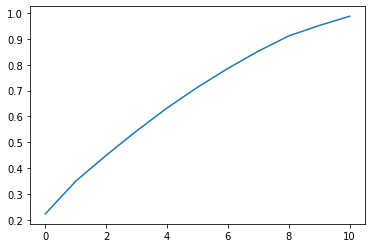

In [19]:
X = []
y = merged_df['genre encoding'].tolist()

for i in range(len(merged_df)):
  temp = []
  for col in cols_to_numeric:
    temp.append(merged_df.iloc[i][col])
  X.append(temp)

scaler = StandardScaler()
X = scaler.fit_transform(X)

pca = PCA(n_components=11)
X2 = pca.fit_transform(X)

print(pca.explained_variance_ratio_)

pc_versus_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(pc_versus_variance)

In [20]:
# determined by graph above -> these 8 components explain >= 95% of the variance
principal_components = 8
pca_model = PCA(n_components=principal_components)

X3 = pca_model.fit_transform(X)

features = [np.abs(pca_model.components_[i]).argmax() for i in range(principal_components)]

significant_features = []
for i in range(principal_components):
  explained_variance = pca_model.explained_variance_ratio_[i]
  significant_features.append((cols_to_numeric[features[i]], explained_variance))

for feature in significant_features:
  print(feature)

('energy', 0.22251925783884807)
('duration_ms', 0.12659509424551862)
('mode', 0.1001641943688178)
('popularity', 0.09456132241875193)
('key', 0.088638101176901)
('explicit', 0.08021299196635275)
('mode', 0.07313438052162453)
('liveness', 0.06674205511285458)


## Random Forest to Analyze Feature Importance

In this section, we determine which 8 features from the spotify dataset are most important in predicting a song's genre.

In [23]:
# features most important to predict genre
rf_df = merged_df[cols_to_numeric]
rf_df['genre encoding'] = merged_df['genre encoding']
rf_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,valence,genre encoding
0,0.2440,0.391,285827,0.681,0,0.000108,4,0.5860,-7.231,1,61,0.255,5
14,0.1430,0.675,202227,0.886,0,0.001300,9,0.2270,-4.312,1,23,0.954,0
15,0.0249,0.663,340920,0.694,1,0.000000,10,0.0698,-8.627,0,69,0.524,2
16,0.1580,0.620,351000,0.529,0,0.000000,7,0.2280,-7.976,1,56,0.630,4
18,0.0116,0.584,256133,0.820,0,0.000040,0,0.0991,-5.228,1,58,0.869,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4494,0.8400,0.696,127560,0.210,0,0.000002,4,0.1070,-11.922,1,60,0.717,5
4498,0.7330,0.357,136027,0.756,0,0.005050,0,0.7600,-8.492,1,67,0.950,5
4502,0.7410,0.534,161560,0.803,0,0.000061,10,0.3070,-9.129,1,75,0.969,0
4505,0.5390,0.454,324133,0.260,0,0.000780,8,0.0675,-13.193,0,67,0.598,9


In [25]:
labels = rf_df['genre encoding']

X_train, X_test, y_train, y_test = train_test_split(rf_df.drop(['genre encoding'], axis=1), labels, test_size=0.2)

rf_model = RandomForestClassifier(n_estimators=200, max_depth=3)
rf_model.fit(X_train, y_train)

feature_importances = rf_model.feature_importances_
labels_idx = np.argsort(feature_importances)

features_and_importance = []

for i in range(len(feature_importances)):
  importance = feature_importances[i]
  features_and_importance.append((cols_to_numeric[labels_idx[i]], importance))

features_and_importance = sorted(features_and_importance, key=lambda x: x[1], reverse=True)

for i in features_and_importance:
  print(i)

('valence', 0.1937359438573571)
('explicit', 0.1685231176539544)
('mode', 0.13463335625309364)
('key', 0.1215822932325177)
('liveness', 0.10365005464253095)
('duration_ms', 0.08762113186538059)
('instrumentalness', 0.0511750871014362)
('danceability', 0.04795589842650549)
('energy', 0.034792603597793445)
('loudness', 0.029997825002757852)
('popularity', 0.02355438272167053)
('acousticness', 0.0027783056450021476)
